In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 1990) 

In [2]:
df = pd.read_csv("owid-covid-data.csv")

In [5]:
df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

In [6]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [7]:
df_ru = df[df['location']=='Russia']

In [13]:
#The first victim in the Wikipedia died on the 27 March 2020. How many people died on that day? What was the cumulative deaths toll on that day?
df_ru[df_ru['date'] == "2020-03-27"]
#Answer: She was the only victim on that day, one out of 4 in total count

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
80159,RUS,Europe,Russia,2020-03-27,1036.0,196.0,111.857,4.0,1.0,0.429,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN


In [32]:
#On which day did the count reach 1000?
date = []
for total in df_ru['total_deaths']:
    if total >=1000:
        date.append(total)
min(date)

1073.0

In [33]:
#Answer:it was on the 30 of April 2020
df_ru[df_ru['total_deaths'] == 1073]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
80193,RUS,Europe,Russia,2020-04-30,106498.0,7099.0,6246.429,1073.0,101.0,74.0,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,-1.89


In [35]:
#On which day did the count reach 100 000?
date = []
for total in df_ru['total_deaths']:
    if total >=100000:
        date.append(total)
min(date)

100158.0

In [36]:
#Answer:it was on the 8 of April 2021
df_ru[df_ru['total_deaths'] == 100158]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
80536,RUS,Europe,Russia,2021-04-08,4563026.0,8545.0,8533.571,100158.0,358.0,366.286,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN


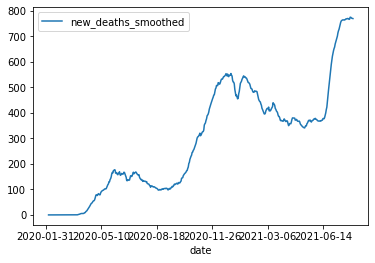

In [50]:
#Let's see how many waves there were and when
df_ru.plot(kind='line', x='date', y='new_deaths_smoothed')

In [42]:
#When was the peak of the first wave?
df_ru.loc[(df_ru['date'] >= "2020-05-20") & (df_ru['date'] <= "2020-07-20")].sort_values(by="new_deaths", ascending=False).head(1)
#It was 29th of May 2020

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
80222,RUS,Europe,Russia,2020-05-29,387623.0,8572.0,8739.286,4374.0,232.0,160.714,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN


In [43]:
#When was the peak of the second wave?
df_ru.loc[(df_ru['date'] >= "2020-12-05") & (df_ru['date'] <= "2021-01-05")].sort_values(by="new_deaths", ascending=False).head(1)
#It was 24th of December 2020

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
80431,RUS,Europe,Russia,2020-12-24,2934695.0,29499.0,28281.143,52434.0,624.0,552.286,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN


In [34]:
#Which day took the lives of the max number of people?
df_ru['new_deaths'].sort_values(ascending = False)

80635    789.0
80643    787.0
80648    784.0
80642    784.0
80647    784.0
         ...  
80146      NaN
80147      NaN
80148      NaN
80149      NaN
80150      NaN
Name: new_deaths, Length: 555, dtype: float64

In [28]:
#Answer: it was on the 16th of July 2021
df_ru[df_ru['new_deaths'] == 789]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
80635,RUS,Europe,Russia,2021-07-16,5835523.0,25188.0,24474.714,144446.0,789.0,755.714,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN
